<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/First_Notebook_SEM2_Consolidating_SEM_1_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log

import math
import pandas as pd

import scipy

In [ ]:
# Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

Pion_Plots_df1 = pd.read_csv('Copy of Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')


## Renaming all of the columns of the dataframe using entries in the first row.
header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()
Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )

## Removing the extra row.
Pion_Plots_df1 = Pion_Plots_df1.drop(0)
Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']


In [ ]:
display(Pion_Plots_df1)

,pz (GeV=c),pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)","[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)","[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...
120,"[56.00,68.00)","[0.50,2.00)",2.81E-03,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58
121,"[68.00,80.00)","[0.20,0.30)",2.36E-04,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN
122,"[68.00,80.00)","[0.30,0.40)",1.88E-04,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN
123,"[68.00,80.00)","[0.40,0.50)",1.88E-04,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
interval_mid_list = []
bin_width_list = []
pT_colour_code_list = []


for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )
  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.10:
    colour_code = 1
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.20:
    colour_code = 2
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.30:
    colour_code = 3
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.40:
    colour_code = 4
    #pT_colour_code_list.append(colour_code)
  else:
    colour_code = 5
    #pT_colour_code_list.append(colour_code)

  pT_colour_code_list.append(colour_code)


bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)
pT_colour_code_array = np.array(pT_colour_code_list)


## Adding new columns to the dataframe

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()
column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value") # storing a ccolumn in the dataframe as a neew variable
Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move) # moving the stored column to the desired place in the dataframe.
Pion_Plots_df1['bin width'] = bin_width_array.tolist()
column_to_move = Pion_Plots_df1.pop("bin width")
Pion_Plots_df1.insert(2, "bin width", column_to_move)
Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)


## Converting columns into floats - in order to make plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)

## Creating a column that contains the heights of each bin's bar, and moving to the desired location in the dataframe.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]    # ----> Divide the count by the bin width.  Thus, when we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count in that particular bin.
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

## Creating new column in which the weighted heights of the histogram bars are stored.

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

#################### Using df.loc - this is in line with the Copy on Write - Old way is through Chained Assignment (for loop etc., etc.) ####################

Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300

## Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)


## Adding two columns for plotting purposes

Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)


In [ ]:
######################### SELECTING THE PIONS WITH SUFFICIENT ENERGY - BY REMOVING PIONS WITH LONGITUDINAL MOMENTUM LESS THAN 5GeV/c  ######################

######################### SEE COMMENT AT END OF FIRST LINE ######################


# # colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )
green_dots_new_x = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 5]
green_dots_new_y = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_new_x) ) : len(green_dots_only_y_axis_values_list) ]  )

red_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['Final pi^+ plot value'] )
red_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['pz (GeV=c) - mid range value'] )
red_dots_new_x = [red_dots_only_x_axis_values_list for red_dots_only_x_axis_values_list in red_dots_only_x_axis_values_list if red_dots_only_x_axis_values_list >= 5]
red_dots_new_y = ( red_dots_only_y_axis_values_list[  len(red_dots_only_y_axis_values_list)  - ( len(red_dots_new_x) ) : len(red_dots_only_y_axis_values_list) ]  )

blue_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['Final pi^+ plot value'] )
blue_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['pz (GeV=c) - mid range value'] )
blue_dots_new_x = [blue_dots_only_x_axis_values_list for blue_dots_only_x_axis_values_list in blue_dots_only_x_axis_values_list if blue_dots_only_x_axis_values_list >= 5 ]
blue_dots_new_y = ( blue_dots_only_y_axis_values_list[  len(blue_dots_only_y_axis_values_list)  - ( len(blue_dots_new_x) ) : len(blue_dots_only_y_axis_values_list) ] )

purple_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['Final pi^+ plot value'] )
purple_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['pz (GeV=c) - mid range value'] )
purple_dots_new_x = [purple_dots_only_x_axis_values_list for purple_dots_only_x_axis_values_list in purple_dots_only_x_axis_values_list if purple_dots_only_x_axis_values_list >= 5 ]
purple_dots_new_y = ( purple_dots_only_y_axis_values_list[  len(purple_dots_only_y_axis_values_list)  - ( len(purple_dots_new_x) ) : len(purple_dots_only_y_axis_values_list) ] )

orange_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['Final pi^+ plot value'] )
orange_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['pz (GeV=c) - mid range value'] )
orange_dots_new_x = [orange_dots_only_x_axis_values_list for orange_dots_only_x_axis_values_list in orange_dots_only_x_axis_values_list if orange_dots_only_x_axis_values_list >= 5 ]
orange_dots_new_y = ( orange_dots_only_y_axis_values_list[ len(orange_dots_only_y_axis_values_list)  - ( len(orange_dots_new_x) ) : len(orange_dots_only_y_axis_values_list) ] )

brown_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['Final pi^+ plot value'] )
brown_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['pz (GeV=c) - mid range value'] )
brown_dots_new_x = [brown_dots_only_x_axis_values_list for brown_dots_only_x_axis_values_list in brown_dots_only_x_axis_values_list if brown_dots_only_x_axis_values_list >= 5 ]
brown_dots_new_y = ( brown_dots_only_y_axis_values_list[ len(brown_dots_only_y_axis_values_list)  - ( len(brown_dots_new_x) ) : len(brown_dots_only_y_axis_values_list) ] )



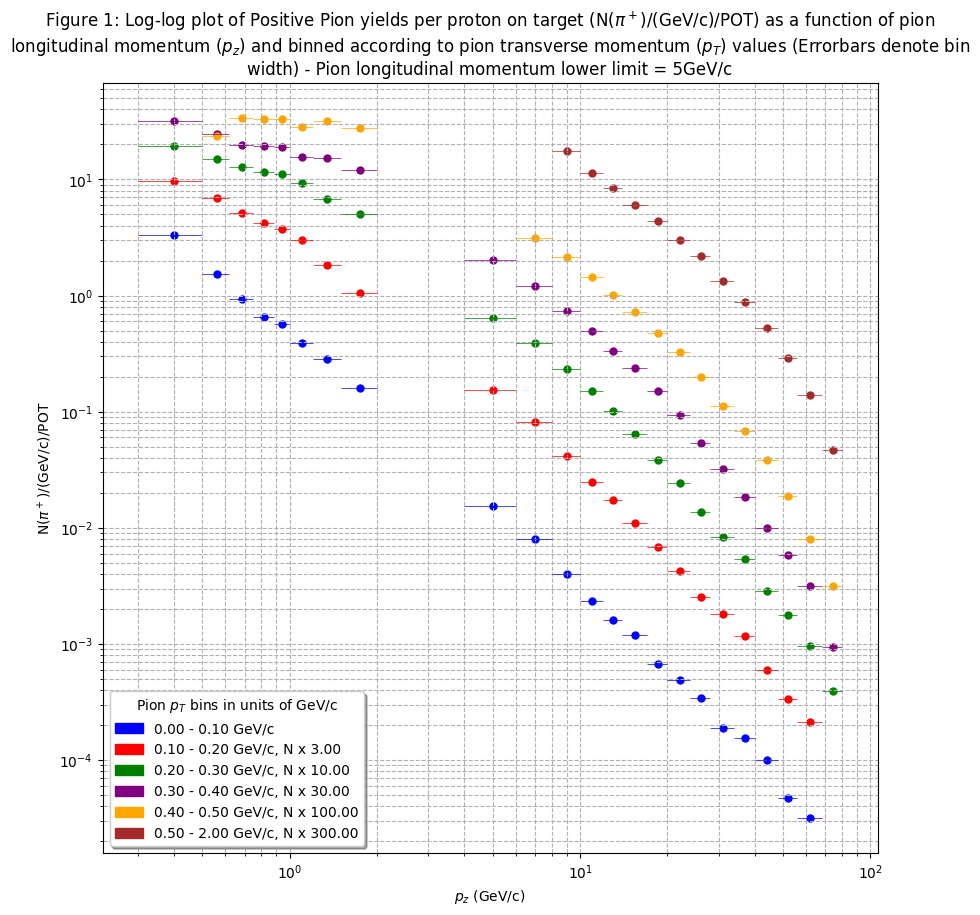

In [ ]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_only_x_axis_values_list   ,   y = red_dots_only_y_axis_values_list   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_only_x_axis_values_list   ,   y = blue_dots_only_y_axis_values_list   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_only_x_axis_values_list   ,   y = purple_dots_only_y_axis_values_list   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_only_x_axis_values_list   ,   y = orange_dots_only_y_axis_values_list   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_only_x_axis_values_list   ,   y = brown_dots_only_y_axis_values_list   ,   c = "brown" , s = 25 , label =  labels_list )

###################### THESE ERROR BAR PLOT ATTEMPTS FAILED ###########################

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

###################### THESE ERROR BAR PLOT ATTEMPTS FAILED ###########################

plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )


plt.xscale("log")
plt.yscale("log")

plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 1: Log-log plot of Positive Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal momentum lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure NUMBER NEEDS TO BE ORGANISED: Log-log plot of Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

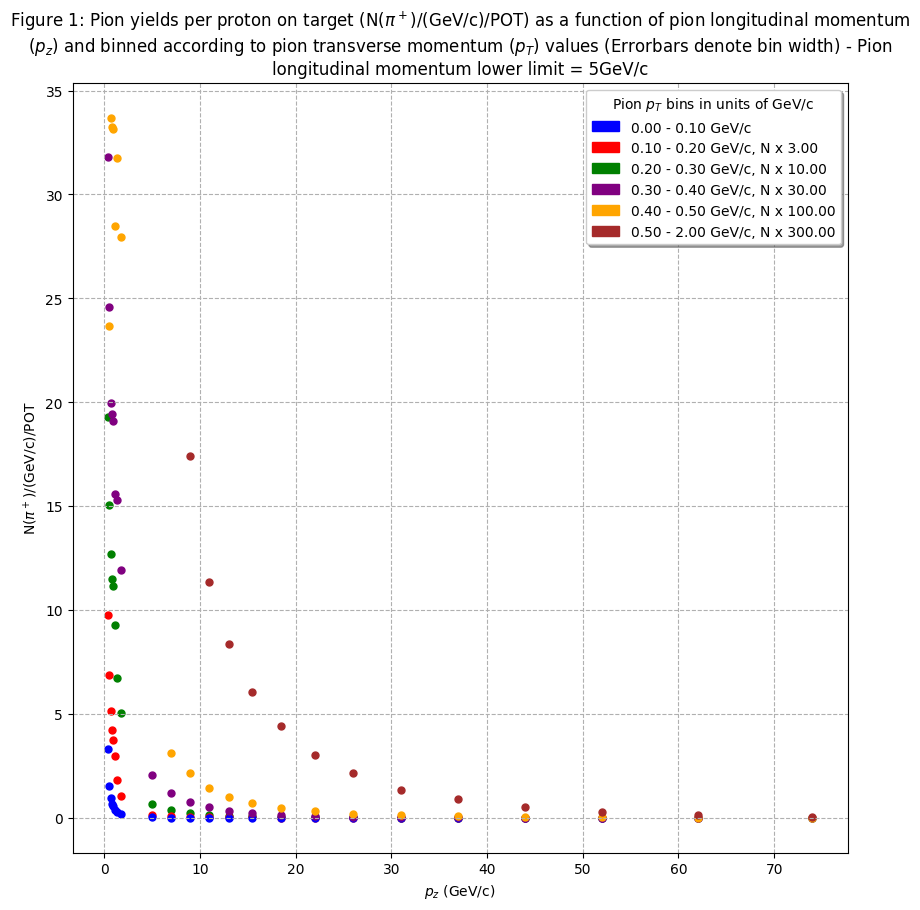

In [ ]:

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_only_x_axis_values_list   ,   y = red_dots_only_y_axis_values_list   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_only_x_axis_values_list   ,   y = blue_dots_only_y_axis_values_list   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_only_x_axis_values_list   ,   y = purple_dots_only_y_axis_values_list   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_only_x_axis_values_list   ,   y = orange_dots_only_y_axis_values_list   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_only_x_axis_values_list   ,   y = brown_dots_only_y_axis_values_list   ,   c = "brown" , s = 25 , label =  labels_list )

plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 1: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal momentum lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure NUMBER NEEDS TO BE ORGANISED: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

<ipython-input-9-6f53ee9138fc>:40: MatplotlibDeprecationWarning: Passing label as a length 7 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )


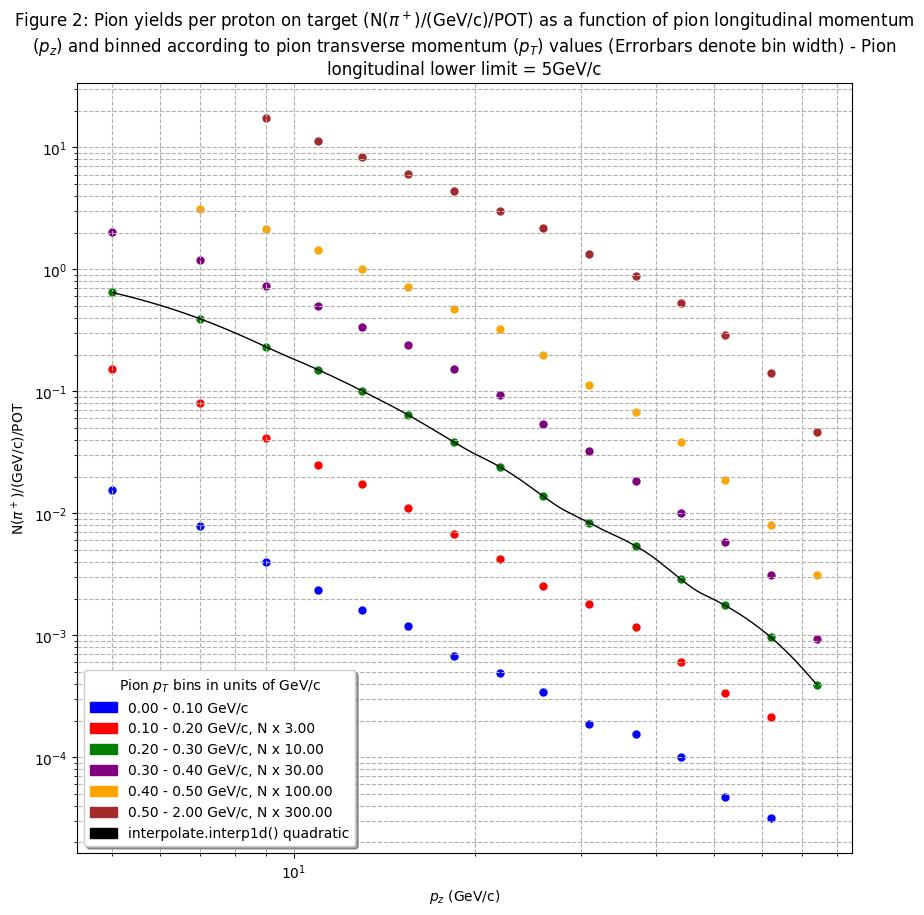

In [ ]:
######################### LIMITING INTERPOLATION TO A NARROW RANGE OF PIONS IN TERMS OF THEIR LONGITUDINAL MOMENTA ######################

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ,  "interpolate.interp1d() quadratic"   ]


blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')
black_patch = mpatches.Patch(color='black', label="interpolate.interp1d() quadratic")


handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ,  black_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_new_x   ,   y = purple_dots_new_y   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_new_x   ,   y = orange_dots_new_y   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_new_x   ,   y = brown_dots_new_y   ,   c = "brown" , s = 25 , label =  labels_list )

#############################################################################################################################
#############################################################################################################################

xnew_array = np.linspace(min(green_dots_new_x), max(green_dots_new_x), 1000)
green_dots_new_x_array = np.array(green_dots_new_x)
green_dots_new_y_array = np.array(green_dots_new_y)
chosen_interpolator = interpolate.interp1d(   green_dots_new_x_array  ,    green_dots_new_y_array , kind = "quadratic" , bounds_error = False  )
ynew_array = chosen_interpolator(xnew_array)

plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )

#############################################################################################################################
#############################################################################################################################

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 2: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

This interpolator (interpolate.interp1d() quadratic) was used to produce histograms.
# **** Would be nice to get some of those histograms directly below this plot.


# ****Were the histograms this interpolator generated the really spikey ones?

# **** We need to have all the interpolators we used next to the histograms they generated.

In [ ]:
          # STRATEGY:
          # You will need to cross check both of the collab documents that are titled "Last Modified Thursday .... "
          # Establish what we did with the wightings
          # Try and find out how we progressed from one interpolator to the next.
          # Including what data points we did and did not exclude from the fitting data.
          # I think.... we decided at the end of to fit an exponential function to the whole data sets (all the green dots, or all the red dots, or all of any one particular colour)
          # If this is what we decided to do, then go and do that fitting and produce new histograms.
          # The TO DO LIST BELOW WILL HELP.
          # Can't remember what we said about a cut off angle and change to weightings?


          # Produce a notebook with all developments in one place, and all plots.


# Weighting pions according to their longitudinal velocities

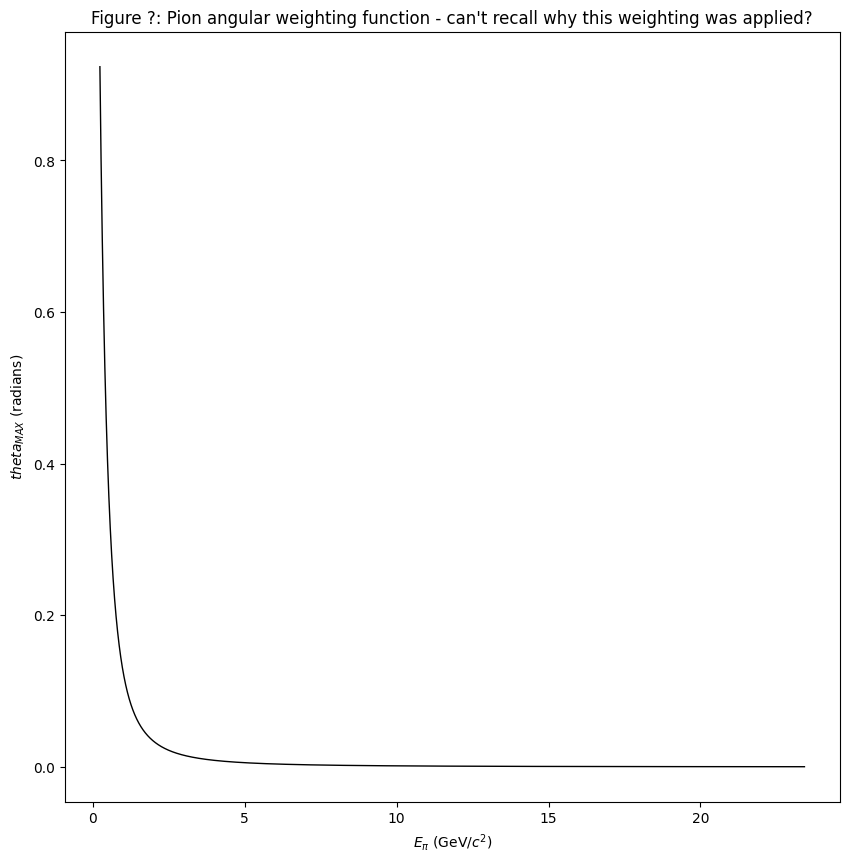

In [ ]:
E_v_star = 29.8 * ( 10 ** -3 )
m_pi = 139.6 * ( 10 ** -3 )

theta = 0.00

E_v = np.linspace( 0.1 , 10 , 10000000 )
my_mean = 120
my_std = 1.2

cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

total_E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

relativistic_KE_pi =  (  ( ( total_E_pi ) ** 2 ) - ( ( m_pi ) ** 2 )  )

gamma_array = ( ( relativistic_KE_pi / m_pi ) + 1 )

beta_array = (  ( 1 - ( 1 / ( ( gamma_array ) ** 2 ) ) ) ** ( 1 / 2 )  )

theta_max = np.arctan(  1 / (beta_array * gamma_array) )

##################        beta_array =                #########################

# print(type( relativistic_KE_pi ) , type( total_E_pi ) )

# print( np.shape(relativistic_KE_pi) , np.shape(total_E_pi), np.shape(gamma_array), np.shape(beta_array) , np.shape(theta_max) )

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)


# plt.scatter(   x = total_E_pi   ,   y = theta_max   ,   c = "green" , s = 5 )

plt.plot(  total_E_pi  , theta_max  , color = "black" , label =  "interpolate.interp1d() quadratic" , linewidth = 1  )

plt.xlabel(r"$E_{\pi}$ (GeV/$c^2$)")
plt.ylabel(r"$theta_{MAX}$ (radians)")

plt.title("\n".join(wrap(r"Figure ?: Pion angular weighting function - can't recall why this weighting was applied?" , 120 ) ) )


plt.show()

# ****WHY WERE WE SO CONCERNED WITH LIMITING OURSELVES TO A CERTAIN RANGE OF THE DATA?

In [ ]:
## These two lines from the code that generated the coordinates for the coloured dots ##
green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )
## These two lines from the code that generated the coordinates for the coloured dots ##

green_dots_only_x_axis_values_list_10 = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list <= 10]
# print(green_dots_only_x_axis_values_list_10)

green_dots_x_only_between_1_5_and_10 = green_dots_only_x_axis_values_list_10[7:]
# print(green_dots_x_only_between_1_5_and_10)

green_dots_only_y_axis_values_list_10 = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_x_only_between_1_5_and_10) ) : len(green_dots_only_y_axis_values_list) ]  )
# print(green_dots_only_y_axis_values_list_10)

green_dots_y_only_between_1_5_and_10 = green_dots_only_y_axis_values_list_10   ######### PROBLEM HERE???
# print(green_dots_y_only_between_1_5_and_10)

#####################
#####################
#green_dots_y_only_between_1_5_and_10 = green_dots_only_y_axis_values_list_10[7:]            ############# SOLUTION?

#####################
#####################


print(len(green_dots_only_x_axis_values_list_10))
print(len(green_dots_only_y_axis_values_list_10))

print(len(green_dots_x_only_between_1_5_and_10))
print(len(green_dots_y_only_between_1_5_and_10))


11
4
4
4


# ****WHAT IS THIS MODEL FUNCTION CELL DOING?

# ****WHY IS params_0 NOT DEFINED?  WHY DID WE GO TO THE TROUBLE OF BLOCKING IT FROM BEING READ?

4
4


NameError: name 'params_p0' is not defined

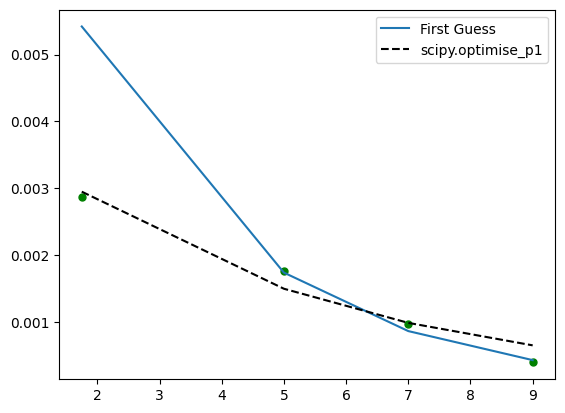

In [ ]:
def model_function(t, a, b):

   return a*np.exp(b*t)

#green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

#green_dots_x_array = np.array(green_dots_only_x_axis_values_list)


green_dots_x_array = np.array(green_dots_x_only_between_1_5_and_10)


x = green_dots_x_array

green_dots_y_array = np.array(green_dots_y_only_between_1_5_and_10)

y = green_dots_y_array

#p0 = [ 10 , -1 ]

p1 = [ 0.01 , -0.35 ]

#params_p0 , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p0 )

params_p1 , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p1 )


plt.scatter(   x = green_dots_x_only_between_1_5_and_10   ,   y = green_dots_y_only_between_1_5_and_10   ,   c = "green" , s = 25 , label =  None)

print(len(green_dots_x_only_between_1_5_and_10))

print(len(green_dots_y_only_between_1_5_and_10))

#plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  None)

plt.plot( x, model_function(x, p1[0] , p1[1]) , label =  "First Guess" )

#plt.plot( x, model_function(x, params_p0[0] , params_p0[1])  , color = "red" , label =  "scipy.optimise_p0" )

plt.plot( x, model_function(x, params_p1[0] , params_p1[1])  ,  color = "black" , label =  "scipy.optimise_p1" , linestyle = "--" )

plt.legend()

print("This is params_p0", params_p0 , "This is params_1", params_p1 )

# plt.xscale("log")
# plt.yscale("log")

#Things to do:  [See Google Sheets file in Week 9 Final Project Folder for this same list]

-1) BUY LAPTOP.  INSTALL VSCODE.  START USING SCRIPTS.  easy.

0) TIDY UP YOURR CODE.  ADD COMMENTS.  NEATLY DEFINE ALL FUNCTIONS... NETALY AND LOGICALLY NAME VARIABLES.

1) Plot a different graph using a linear scale.  This is the graph of the pion longitudinal momenta data.   My current plot is log-log.  I can still use this plot in the report, but I need to go to a linear scale to better interpolate... and hopefully produce histograms that replicate real world measurements at the near NOVA detector.

2) Fit an exponential to all of the data.  So, for all the green dots, or all the red dots, or whatever colour.

3) Theta_detector and Theta_max ... the relative sizes of these two angles determines if all neutrinos hit detector.  The relative sizes of the angles also determines if one should be divided by the other or not.  If Theta_detector is smaller than Theta_max, we need to do Theta_detector / Theta_max  in order to get the proportion of neutrinos that actually arrive at the detector.

4) Then determine a small cut off angle called epsilon.  Have all angles above this epsilon receive a reducing weighting.  All angles below this epsilon should have no weighting at all.

5) I think she was saying that epsilon is Theta_detector.

6) Then work on producing more histograms for on and off axis.

7) See if your plots have a nice natural drop off, rather than the sharp sudden cut off they currently exhibit.

8) NOTE ON THE INTERPOLATOR:  FEATURING ALL THE DATA POINTS SHOULDD TAKE CARE OF THE LOWER ENERGY PIONS AND WILL HOPEFULLY LEADD TO LOWEER ENERGY NEUTRINOS BEING PRODUCED IN THE SIMULATION.  I.E., THE HISTOGRAMS WILL LOOK MORE NATURAL AND LESS SPIKEY.


9) Complete Checkpoint 1 to Abbey.

10) Send Checkpoint 1 to Abbey.

11) Start to write out the introduction.  Include a brief historical account full of citations... preferentially the original papers that first discussed the neutrino.

12) MOVE ON TO NEXT CHALLENGE... THE DACAY TUBE PHYSICS... (SEE NOTES TAKEN IN MEETING)

13) ALSO see document Abbey sent you referring to page 27
